In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller , kpss
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy

In [220]:
size = 1000
mu , sigma = 0 , 1
mu_y , sigma_y = 2 , 4

In [221]:
x = pd.DataFrame(np.random.normal(mu,sigma,size),index= np.arange(0,1000))
y = pd.DataFrame(np.random.normal(mu_y,sigma_y,size),index= np.arange(0,1000))

<Axes: >

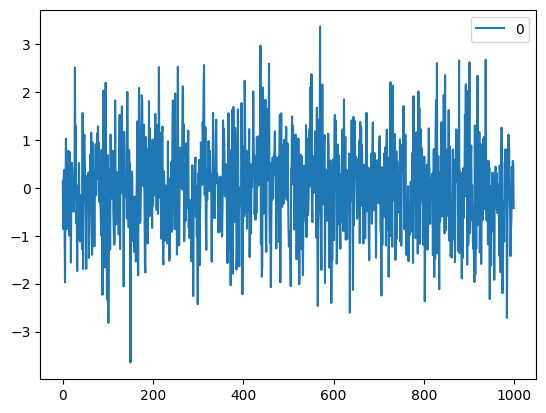

In [222]:
x.plot()

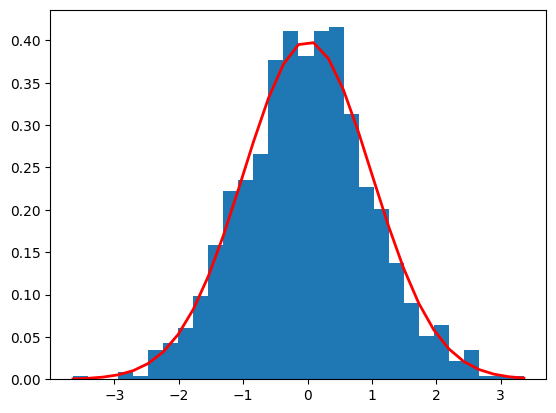

In [223]:
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [224]:
scipy.mean(x)

<ipython-input-224-fc5232892828>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(x)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0   -0.012092
dtype: float64

In [225]:
scipy.stats.tstd(x)

array([0.99306279])

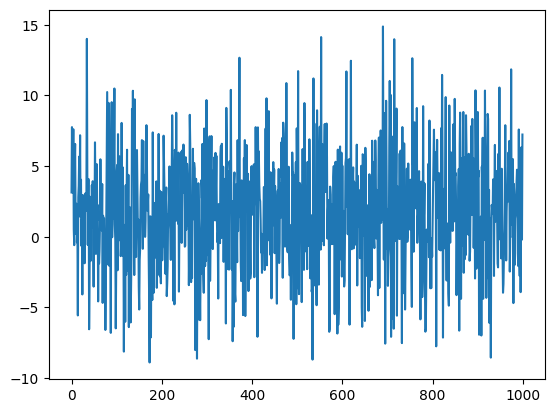

In [226]:
plt.plot(y)

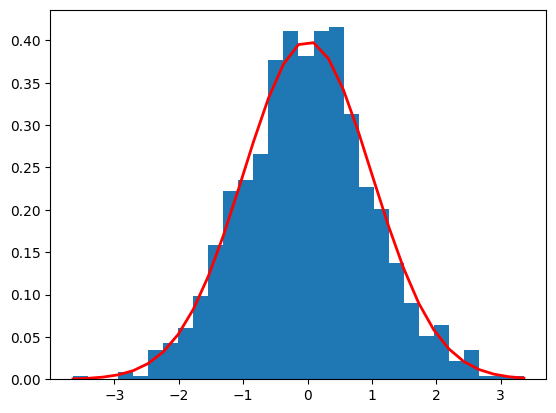

In [227]:
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [228]:
scipy.mean(y)

<ipython-input-228-d358e917e35a>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(y)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0    1.835492
dtype: float64

In [229]:
scipy.stats.tstd(y)

array([4.06552555])

In [230]:
train_start = 0
train_end = 499

test_start = 500
test_end = 1000

In [231]:
ols = sm.OLS(y,x)
lm = ols.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.7949
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                       0.373
Time:                        23:04:00   Log-Likelihood:                         -2913.4
No. Observations:                1000   AIC:                                      5829.
Df Residuals:                     999   BIC:                                      5834.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [232]:
steps = np.random.normal(mu,sigma,size)
steps_y = np.random.normal(mu_y,sigma_y,size)
x_non_stationary =  pd.DataFrame(100 + np.cumsum(steps),index= np.arange(0,1000))
x_non_stationary_lagged = x_non_stationary.shift(1)
x_non_stationary_lagged.dropna(axis=0,inplace=True)
y_non_stationary =   pd.DataFrame(100 + np.cumsum(steps_y),index= np.arange(0,1000))

In [235]:
x_matrix = pd.DataFrame()
x_matrix["current_x"] = x_non_stationary[0:999]
x_matrix["lagged_x"] = x_non_stationary_lagged[0:999]
x_matrix.dropna(axis=0,inplace=True)

In [236]:
x_matrix

current_x    lagged_x
1     98.399282   98.149006
2     98.280886   98.399282
3     98.556615   98.280886
4     96.318955   98.556615
5     97.412323   96.318955
..          ...         ...
994  109.535046  109.891714
995  110.242324  109.535046
996  109.969722  110.242324
997  110.118293  109.969722
998  111.117779  110.118293

[998 rows x 2 columns]

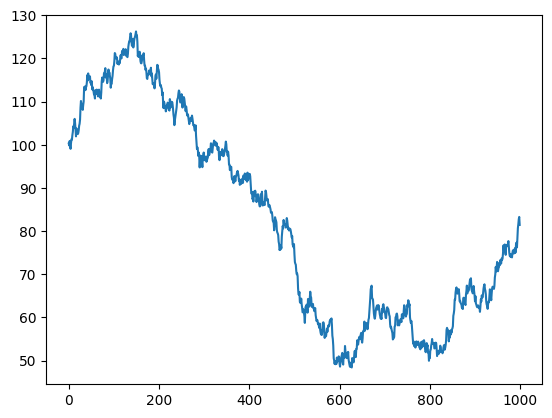

In [190]:
plt.plot(x_non_stationary)

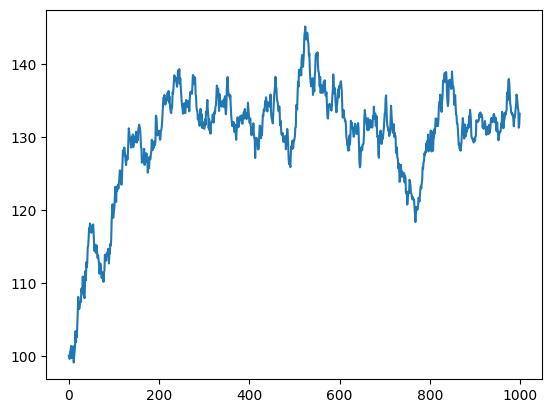

In [191]:
plt.plot(y_non_stationary)

In [192]:
ols = sm.OLS(y_non_stationary,x_non_stationary)
lm = ols.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              9801.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                        0.00
Time:                        22:30:50   Log-Likelihood:                         -5096.6
No. Observations:                1000   AIC:                                  1.020e+04
Df Residuals:                     999   BIC:                                  1.020e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [243]:
x_matrix = x_matrix.reset_index()

In [244]:
ols = sm.OLS(y_non_stationary.iloc[0:998,0],x_matrix.loc[0:998,['current_x','lagged_x']])
lm = ols.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              2106.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                        0.00
Time:                        00:12:45   Log-Likelihood:                         -7644.4
No. Observations:                 998   AIC:                                  1.529e+04
Df Residuals:                     996   BIC:                                  1.530e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [195]:
lm = LinearRegression()
lm.fit(x[train_start:train_end],y[train_start:train_end])

LinearRegression()

In [196]:
residuals = y[test_start:test_end] - lm.predict(x[test_start:test_end])

<Axes: >

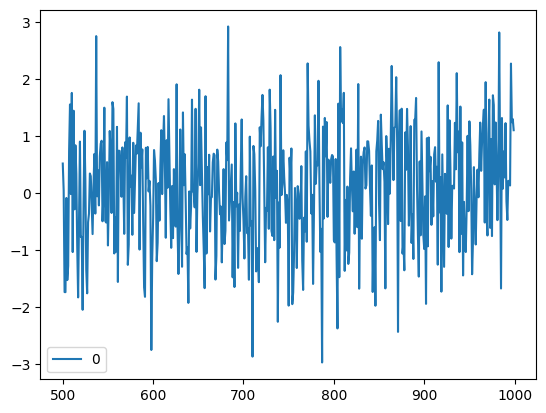

In [198]:
residuals.plot()

In [200]:
adfuller(residuals)

(-12.753804093890963,
 8.423533501802878e-24,
 2,
 497,
 {'1%': -3.4435761493506294,
  '5%': -2.867372960189225,
  '10%': -2.5698767442886696},
 1366.9343966932422)

In [238]:
kpss(residuals)

(0.6709994557854182,
 0.016181867655871072,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})